<a href="https://colab.research.google.com/github/lagerasimov/basic/blob/main/%D0%9C%D0%BE%D1%8F_%D0%BF%D0%B5%D1%80%D0%B2%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B5%D0%B4%D0%BC%D0%B5%D1%82%D0%B0_%D0%BE%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B_%D0%BF%D0%BE_%D1%84%D0%BE%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Подключение необходимых библиотек и функций

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
names = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

##Отображение первых 25 картинок

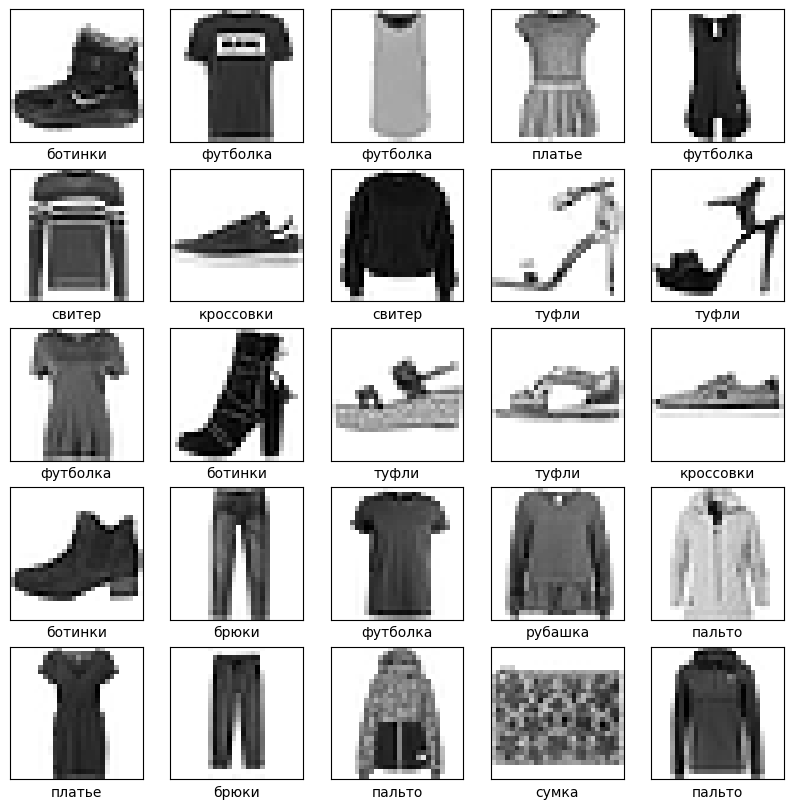

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(names[y_train[i]])

##Изменение размерности данных в наборе

In [ ]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

##Стандартизация данных

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

##Преобразование выходных значений в векторы по категориям (к виду one hot encoding)

In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

##Формирование нейронной сети и вывод её структуры

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


##Компиляция модели нейронной сети

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

##Обучение нейронной сети


In [ ]:
history = model.fit(x_train, y_train, batch_size=200, epochs=100, validation_split=0.2)

Epoch 1/100
240/240 [==============================] - 7s 17ms/step - loss: 1.3573 - accuracy: 0.6027 - val_loss: 0.8844 - val_accuracy: 0.7289
Epoch 2/100
240/240 [==============================] - 4s 15ms/step - loss: 0.7789 - accuracy: 0.7509 - val_loss: 0.7024 - val_accuracy: 0.7709
Epoch 3/100
240/240 [==============================] - 4s 15ms/step - loss: 0.6574 - accuracy: 0.7850 - val_loss: 0.6210 - val_accuracy: 0.7981
Epoch 4/100
240/240 [==============================] - 5s 21ms/step - loss: 0.5949 - accuracy: 0.8041 - val_loss: 0.5699 - val_accuracy: 0.8095
Epoch 5/100
240/240 [==============================] - 3s 11ms/step - loss: 0.5563 - accuracy: 0.8149 - val_loss: 0.5447 - val_accuracy: 0.8149
Epoch 6/100
240/240 [==============================] - 2s 8ms/step - loss: 0.5289 - accuracy: 0.8221 - val_loss: 0.5246 - val_accuracy: 0.8207
Epoch 7/100
240/240 [==============================] - 2s 8ms/step - loss: 0.5098 - accuracy: 0.8279 - val_loss: 0.5068 - val_accuracy: 0

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8760


[0.3582696318626404, 0.8759999871253967]

##Визуализация процесса обучения

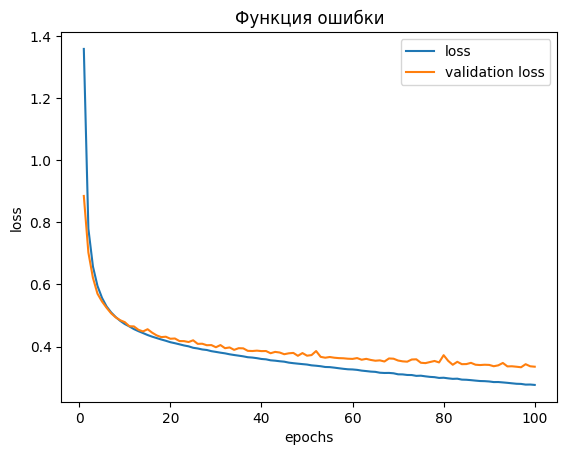

In [ ]:
plt.plot([i+1 for i in range(100)], history.history['loss'])
plt.plot([i+1 for i in range(100)], history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Функция ошибки')
plt.legend(['loss', 'validation loss'])

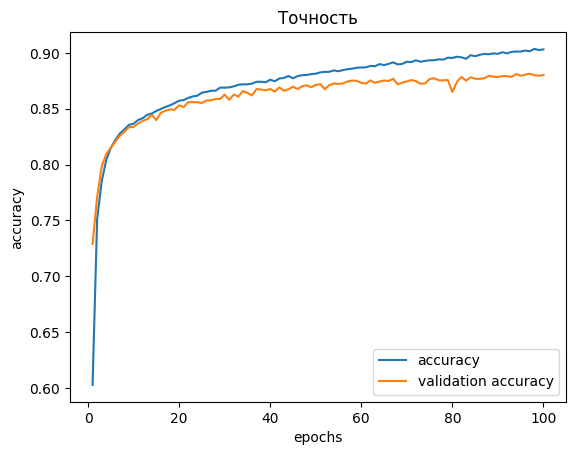

In [ ]:
plt.plot([i+1 for i in range(100)], history.history['accuracy'])
plt.plot([i+1 for i in range(100)], history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Точность')
plt.legend(['accuracy', 'validation accuracy'])

##Запуск распознавания набора данных

In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


##Проверим результат для произвольного значения

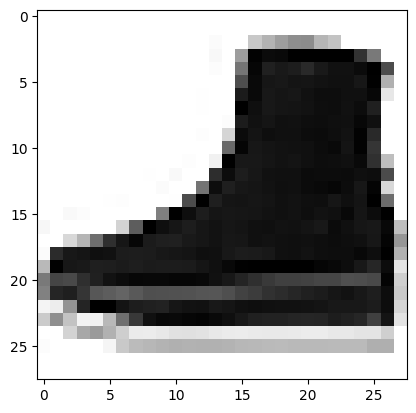

[4.9188684e-09 2.5414848e-13 1.1254430e-10 7.0246565e-13 6.7578330e-15
 2.1410079e-04 3.5778155e-11 1.4507503e-03 2.6061358e-07 9.9833494e-01]
Предмет: ботинки
Правильный ответ: ботинки


In [ ]:
n = np.random.randint(0, 10000)
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(predictions[n])
print('Предмет:', names[np.argmax(predictions[n])])
print('Правильный ответ:', names[np.argmax(y_test[n])])

##Некоторые случаи неправильной работы нейронной сети

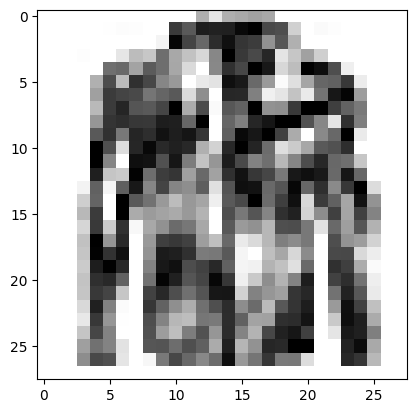

[1.0747064e-03 5.2343620e-07 9.6791959e-01 1.1835498e-05 1.5264973e-02
 1.1111381e-11 1.5393151e-02 3.1153129e-11 3.3511629e-04 6.0962748e-08]
Предмет: свитер
Правильный ответ: пальто


In [ ]:
indexes = []

for n in range(20):
  if np.argmax(predictions[n]) != np.argmax(y_test[n]):
    indexes.append(n)

for i in range(len(indexes)):
  k = indexes[i]
  plt.imshow(x_test[k].reshape(28, 28), cmap=plt.cm.binary)
  plt.show()
  print(predictions[k])
  print('Предмет:', names[np.argmax(predictions[k])])
  print('Правильный ответ:', names[np.argmax(y_test[k])])

##Распознавание изображения по загружаемой фотографии

Загрузка изображения

In [ ]:
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image

In [ ]:
d = files.upload()
imag = "image.jpg"

Saving image.jpg to image.jpg


In [ ]:
imag = "image.jpg"

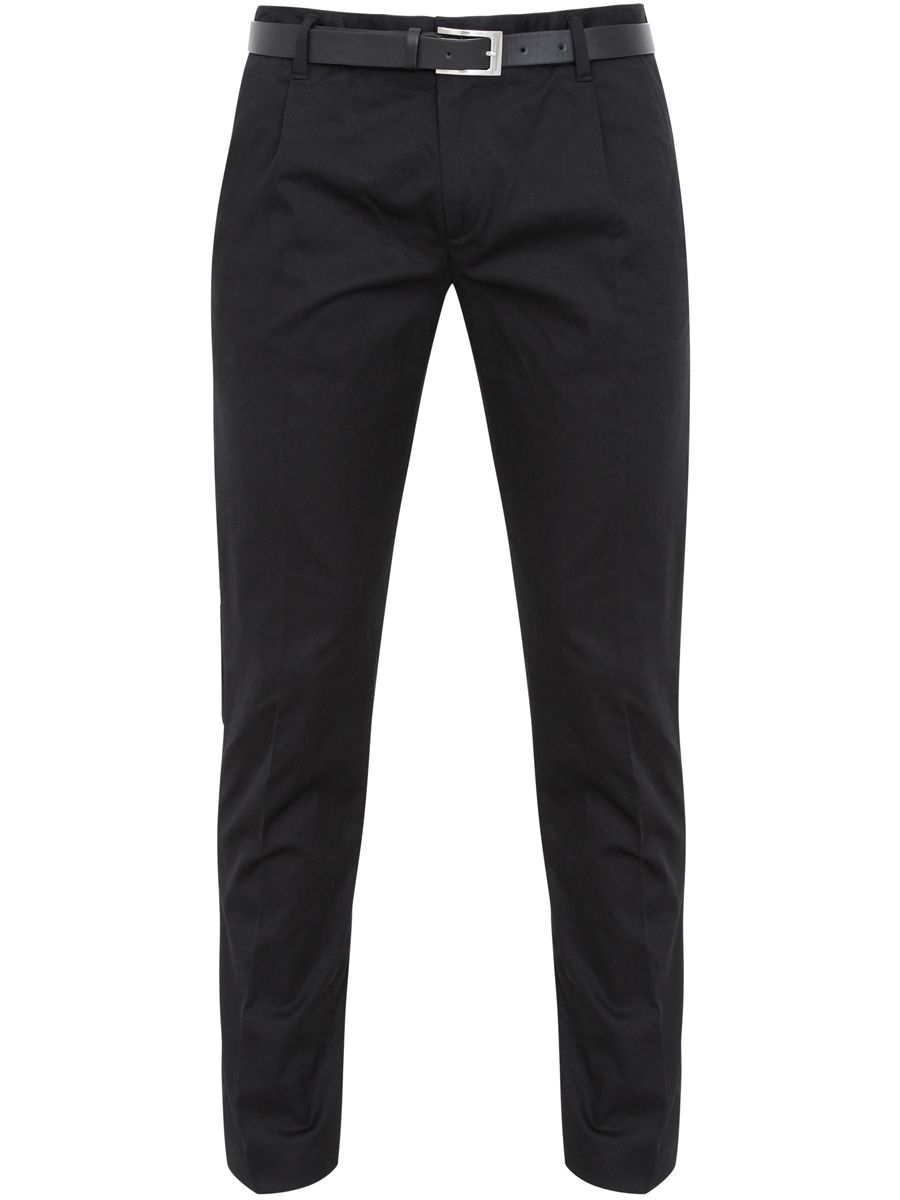

In [ ]:
Image(imag, width=150, height=150)

In [ ]:
our_image = image.load_img(imag, target_size=(28, 28), color_mode = "grayscale")

Обработка изображения

In [ ]:
x = image.img_to_array(our_image)
x = x.reshape(1, 784)
x = 255 - x
x /= 255

Запуск распознавания

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 26ms/step


array([[1.7436375e-03, 9.9711072e-01, 7.7798264e-05, 6.0218031e-04,
        2.8362527e-05, 2.3760174e-10, 4.2759880e-04, 8.9938936e-09,
        9.6532231e-06, 2.9030271e-11]], dtype=float32)

Результат распознавания

In [ ]:
prediction

[[1.7436375e-03 9.9711072e-01 7.7798264e-05 6.0218031e-04 2.8362527e-05
  2.3760174e-10 4.2759880e-04 8.9938936e-09 9.6532231e-06 2.9030271e-11]]


Вывод результата в наглядном виде

In [ ]:
u = np.argmax(prediction)
print("Номер класса:", u)
print("Название класса:", names[u])

Номер класса: 1
Название класса: брюки
